# Sentiment Analysis with twitter data  
This project entails analyzing the sentiment associated with tweets on the current pandemic of covid-19.(As at 24-03-2020)  
The data is obtained from twitter using a script I designed,you may have a look at it [here.](https://github.com/lyraxvincent/twitter-tweepy/blob/master/tweetscrap.py)    
I modified the script to fit the needs:
- Tweets obtained are only from the country Kenya
- Tweets obtained are only in the English language
- No retweets obtained

I used the powerful text processing python module **TextBlob** for this task. ([documentation](https://textblob.readthedocs.io/en/dev/))

**Import necessary modules**

In [78]:
import pandas as pd
from textblob import TextBlob

Load the data

In [79]:
tweets = pd.read_csv('covidKE tweets.csv')

Viewing the data

In [80]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,Everyday might not be good but there's always ...,2020-03-23 16:17:58,1
1,1242123396684697603,The next one week 😷\n\n #coronaviruskenya,2020-03-23 16:17:49,0
2,1242123373188124673,#coronaviruskenya #LockdownNow #UhuruKenyatta ...,2020-03-23 16:17:44,0
3,1242086219519012867,Internet never forget we will remind you that ...,2020-03-23 13:50:06,0
4,1242123367882330113,@ntsa_kenya @DCI_Kenya #coronaviruskenya If on...,2020-03-23 16:17:43,0


In [81]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1190 non-null   int64 
 1   text        1190 non-null   object
 2   created_at  1190 non-null   object
 3   likes       1190 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 37.3+ KB


## Text Preprocessing

We remove any special characters, punctuations and stopwords from the tweets.

In [82]:
import re
import string
import nltk
from nltk.corpus import stopwords

Let's design a function for this task

In [83]:
regex = re.compile('[^a-zA-Z]')
words = set(nltk.corpus.words.words())

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def text_process(text):
    np = text.lower().split('#coronaviruskenya') # Remove the hashtag
    np = ''.join(np)
    np = [c for c in np if c not in string.punctuation]
    np = [c for c in np if c != '\n'] # Removing newline
    np = ''.join(np)
    np = np.split('https')[0] # Remove links
    np = regex.sub(' ', np) # Remove emojis and any non-letters
    np = [word for word in np.split() if word not in stopwords.words('english')] # Remove stopwords
    np = [word for word in np if word in words or not word.isalpha()] # removal of non-english words
    np = [lemmatizer.lemmatize(word) for word in np] # lemmatization
    np =  ' '.join(np)
    #textblob spelling correction
    np = TextBlob(np)
    return str(np.correct())

In [84]:
# Apply function to the text column
# We will overwrite the text column (after testing the function on a single tweet)

tweets['text'] = tweets['text'].apply(text_process)

In [85]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,everyday might good there always something goo...,2020-03-23 16:17:58,1
1,1242123396684697603,next one week,2020-03-23 16:17:49,0
2,1242123373188124673,imagine people coming self something h,2020-03-23 16:17:44,0
3,1242086219519012867,never forget remind fight corona,2020-03-23 13:50:06,0
4,1242123367882330113,they provide food outdoor step well quarante,2020-03-23 16:17:43,0


## Sentiment Analysis

An example to show how we get the sentiment score/polarity for a single tweet

In [86]:
TextBlob(tweets.text[0]).sentiment

Sentiment(polarity=0.39999999999999997, subjectivity=0.6000000000000001)

In [87]:
TextBlob(tweets['text'][0]).sentiment.polarity

0.39999999999999997

Let's add a numerical column relating to text; text length 

In [88]:
tweets['text length'] = tweets['text'].apply(len)

In [89]:
tweets.head()

,tweet_id,text,created_at,likes,text length
0,1242123434466979841,everyday might good there always something goo...,2020-03-23 16:17:58,1,57
1,1242123396684697603,next one week,2020-03-23 16:17:49,0,13
2,1242123373188124673,imagine people coming self something h,2020-03-23 16:17:44,0,38
3,1242086219519012867,never forget remind fight corona,2020-03-23 13:50:06,0,32
4,1242123367882330113,they provide food outdoor step well quarante,2020-03-23 16:17:43,0,44


Now we design a function to apply to the text column to produce polarity for each tweet

In [90]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

We add a new column to the dataframe based off of tweet polarity

In [91]:
tweets['polarity'] = tweets['text'].apply(get_polarity)

In [92]:
# Short form using lambda
##
#tweets['polarity'] = tweets['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [93]:
tweets.sample(30)

,tweet_id,text,created_at,likes,text length,polarity
386,1242105494883446796,people flying country force infected confirmed,2020-03-23 15:06:41,0,46,0.400000
1127,1242068201732743176,hard time ahead president thinking otherwise i...,2020-03-23 12:38:30,1,67,-0.291667
1012,1242077510805979138,,2020-03-23 13:15:29,0,0,0.000000
1171,1242064802916306944,finally guy behind looking escape,2020-03-23 12:25:00,4,33,-0.200000
567,1242067958328893448,day since said self quarante two period see bus,2020-03-23 12:37:32,0,47,0.000000
1028,1242076823795773440,government serious rich trying force corona po...,2020-03-23 13:12:46,0,50,-0.119444
496,1242101086669996038,could way chip help u survive anaemic personally,2020-03-23 14:49:10,0,48,0.000000
803,1242090349805350912,went slow stupid silly government law always a...,2020-03-23 14:06:30,2,52,-0.533333
1055,1242074830842793985,probably best thing read today click link,2020-03-23 13:04:50,1,41,1.000000
421,1242104144342716416,invention year,2020-03-23 15:01:19,0,14,0.000000


Tweets with lowest polarity(-1)

In [94]:
tweets[tweets['polarity'] == -1]

,tweet_id,text,created_at,likes,text length,polarity
357,1242106974927573000,a dont think worst time,2020-03-23 15:12:34,2,23,-1.0
645,1242096205234085894,worst thing father mother brother sister u,2020-03-23 14:29:47,1,42,-1.0
1009,1242077721976545280,worst time cut could,2020-03-23 13:16:20,0,20,-1.0


Tweets with polarity 0

In [95]:
tweets[tweets['polarity'] == 0]

,tweet_id,text,created_at,likes,text length,polarity
1,1242123396684697603,next one week,2020-03-23 16:17:49,0,13,0.0
2,1242123373188124673,imagine people coming self something h,2020-03-23 16:17:44,0,38,0.0
3,1242086219519012867,never forget remind fight corona,2020-03-23 13:50:06,0,32,0.0
4,1242123367882330113,they provide food outdoor step well quarante,2020-03-23 16:17:43,0,44,0.0
5,1242123307903844353,like said total shutdown,2020-03-23 16:17:28,0,24,0.0
...,...,...,...,...,...,...
1181,1242064302816874502,inequality different would,2020-03-23 12:23:00,0,26,0.0
1182,1242064212895174662,death zimbabwe corona virus,2020-03-23 12:22:39,4,27,0.0
1183,1242064211800477697,three county came back trip put mandatory quar...,2020-03-23 12:22:39,2,50,0.0
1184,1242064200840744960,graceful enough observe protocol stay matter u...,2020-03-23 12:22:36,2,65,0.0


Tweets with highest polarity(1)

In [96]:
tweets[tweets['polarity'] == 1]

,tweet_id,text,created_at,likes,text length,polarity
237,1242112888082481153,best version crisis,2020-03-23 15:36:04,0,19,1.0
1055,1242074830842793985,probably best thing read today click link,2020-03-23 13:04:50,1,41,1.0
1066,1242073657297551370,create best shoe impression made recorder,2020-03-23 13:00:11,0,41,1.0


In [97]:
# It is evident that more than half of the obtained tweets have polarity 0

Tweets with negative polarity

In [98]:
tweets[tweets['polarity'] < 0]

,tweet_id,text,created_at,likes,text length,polarity
10,1242099789694750720,need help mean corona na cure,2020-03-23 14:44:01,1,29,-0.3125
11,1242099788893564929,money anaemic difficult chose dying hunger,2020-03-23 14:44:01,0,42,-0.5000
27,1242122438814715904,time want see coming help poor society see,2020-03-23 16:14:01,0,42,-0.4000
40,1242122030373318657,logic behind gap bathroom,2020-03-23 16:12:24,0,25,-0.4000
59,1242121385666887681,shutdown deal worse,2020-03-23 16:09:50,2,19,-0.4000
...,...,...,...,...,...,...
1172,1242064801540591621,sad god bless u god u,2020-03-23 12:24:59,3,21,-0.5000
1174,1242064688533438464,poor way anaemic watching,2020-03-23 12:24:32,2,25,-0.4000
1186,1242064012797530112,time put mandatory hate happening,2020-03-23 12:21:51,1,33,-0.8000
1188,1242063856727396352,incompetent wont die,2020-03-23 12:21:14,2,20,-0.3500


Tweets with positive polarity

In [99]:
tweets[tweets['polarity'] > 0]

,tweet_id,text,created_at,likes,text length,polarity
0,1242123434466979841,everyday might good there always something goo...,2020-03-23 16:17:58,1,57,0.400000
8,1242069774231887880,wish would much presidential address waiting t...,2020-03-23 12:44:45,2,50,0.200000
13,1242116336739913728,taken since last buy gas different life normal...,2020-03-23 15:49:46,1,54,0.037500
16,1242122964608434181,safe stop spread could,2020-03-23 16:16:06,1,22,0.500000
20,1242099340342067203,confirmed one case confirmed today,2020-03-23 14:42:14,5,34,0.400000
...,...,...,...,...,...,...
1168,1242064900278620160,go many to please na k,2020-03-23 12:25:23,2,22,0.500000
1170,1242064847866662913,way taking win though,2020-03-23 12:25:10,1,21,0.800000
1173,1242064784163573760,dating sugar worth,2020-03-23 12:24:55,2,18,0.300000
1176,1242064663577272321,advice young looking sugar mummy,2020-03-23 12:24:26,1,32,0.100000


## Some EDA

In [100]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

**Distribution of polarity**

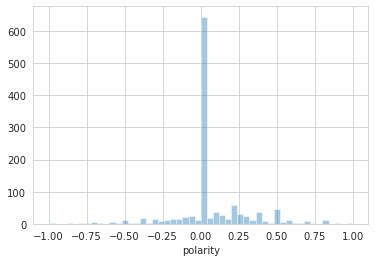

In [101]:
sns.distplot(tweets['polarity'], bins=50, kde=False)

**Distribution of text length**

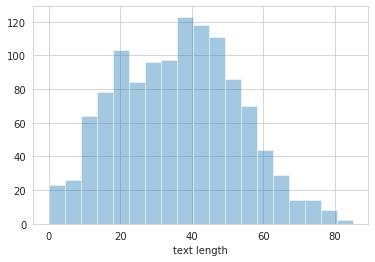

In [102]:
sns.distplot(tweets['text length'], kde=False)

A jointplot to show relation of text length and polarity

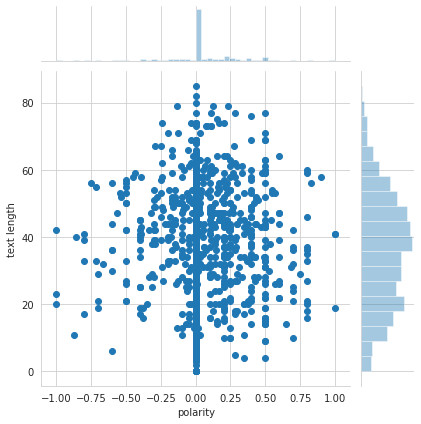

In [103]:
sns.jointplot(x='polarity', y='text length', data=tweets)

Most lengthy(range from 60 to 100) tweets range polarity from -0.25 and 0.25 from the jointplot above  
This is roughly around polarity 0, so we wouldn't be wrong to say that most lengthy tweets(in this range) have polarity of 0, or more appealing, around polarity 0  
Let's get the mean length of tweets with polarity 0 to see that indeed this length lies in this range(60 to 100)

In [104]:
tweets[tweets['polarity']==0]['text length'].mean()

31.767741935483873

To further visualize this fact, let's create the same plot but of hexagonal and regressional nature

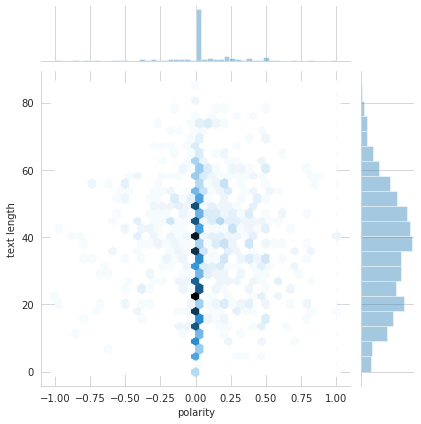

In [105]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='hex')

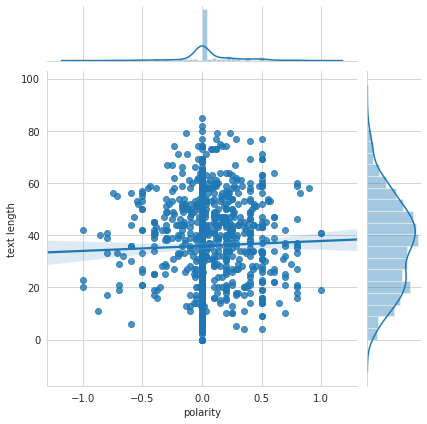

In [106]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='reg')

From this jointplot we can clearly see that the kde on the upper side of the plot shows some normal distribution around polarity 0  
This justifies our above argument that most lengthy(our range of 'lengthy') tweets have polarity of 0 (or around 0)

## Project conclusion

Clearly, we have seen that like half of the tweets have polarity of around 0.  
Does this mean that when a population is under such fear and anxiety of an epidemic, their messages express no negativity or positivity but are more neutral?

## Model Building

I'll build a simple model with this data to conclude the project.  
See the [other](https://github.com/lyraxvincent/sentiment-analysis/blob/master/sentiment%20classifier%20modeling.ipynb) notebook in this project folder for the model building part.

In [108]:
# Saving th data for further use in the model building phase
##
tweets.to_csv("tweets.csv", index=False)